<a href="https://colab.research.google.com/github/sowmyakavali/Basic-Neural-Network/blob/main/Cifar10_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Imports 

In [1]:
# Import Libraries
import sys
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

#### ModelA

In [2]:
class NetA:

    def __init__(self):
        self.input_shape = (32, 32, 3)

    def model(self):
        model = tf.keras.models.Sequential()
        model.add( keras.layers.Flatten( input_shape = self.input_shape))
        model.add( keras.layers.Dense( 10, activation = "softmax"))
        model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
        return model

#### ModelB

In [3]:
class NetB:

    def __init__(self):
        self.input_shape = (32, 32, 3)

    def model(self): 
        model = tf.keras.models.Sequential()
        model.add( keras.layers.Flatten( input_shape = self.input_shape))
        model.add( keras.layers.Dense(300, activation = 'relu'))
        model.add( keras.layers.Dense(10, activation = 'softmax')) 
        model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
        return model      

#### ModelC

In [4]:
class NetC:

    def __init__(self):
        self.input_shape = (32, 32, 3)

    def model(self):
        model = tf.keras.models.Sequential()
        model.add( keras.layers.Conv2D(25, (5,5), activation = 'relu', input_shape = self.input_shape) )
        model.add( keras.layers.MaxPooling2D((2,2)) )
        model.add( keras.layers.Flatten() )
        model.add( keras.layers.Dense(10, activation = 'softmax') ) 
        model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] ) 
        return model

#### Plot function

In [5]:
def plot(history):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    plt.title('Classification Accuracy')  
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test') 
    plt.legend(['train', 'test'], loc='upper left')

    ax2 = fig.add_subplot(1,2,2)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test') 
    plt.legend(['train', 'test'], loc='upper left')   
    plt.show()

#### Load Dataset 

In [6]:
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

# Important arguments
EPOCHS_NUM = 50
BATCH_SIZE = 128

### Run each model

In [7]:
# Initialize all model classes
nets = [NetA(), NetB(), NetC()]
# store evaluation metrics
results = []

for net in nets:
    net_name = type(net).__name__
    print('[INFO] {} Started'.format(net_name))
    # Load model
    model = net.model()
    # fit model
    history = model.fit(trainX, trainY, epochs = EPOCHS_NUM, batch_size = BATCH_SIZE, validation_data = (testX, testY))
    # evaluate model
    test_loss, test_accuracy = model.evaluate(testX, testY) 
    train_loss, train_accuracy = model.evaluate(trainX, trainY) 
    # Print metrics for each model 
    print('Validation Accuracy : {} \nValidation Loss: {} '.format(round(test_accuracy * 100.0,2), round(test_loss * 100.0,2)))  
    print('Training Accuracy : {} \nTraining Loss : {} '.format(round(train_accuracy * 100.0, 2), round(train_loss * 100.0, 2)))  
    # plot(history)  
    results.append({'net':net_name,
                    'History' : history,
                    'test_acc': round(test_accuracy * 100.0,2),
                    'train_acc':round(train_accuracy * 100.0, 2) })                               

[INFO] NetA Started
Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9361 - accuracy: 0.3140 - val_loss: 1.8139 - val_accuracy: 0.3577
Epoch 2/50
391/391 [==============================] - 1s 4ms/step - loss: 1.8293 - accuracy: 0.3605 - val_loss: 1.8462 - val_accuracy: 0.3657
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 1.8080 - accuracy: 0.3694 - val_loss: 1.8268 - val_accuracy: 0.3592
Epoch 4/50
391/391 [==============================] - 1s 3ms/step - loss: 1.7849 - accuracy: 0.3791 - val_loss: 1.7813 - val_accuracy: 0.3807
Epoch 5/50
391/391 [==============================] - 1s 3ms/step - loss: 1.7712 - accuracy: 0.3859 - val_loss: 1.8250 - val_accuracy: 0.3572
Epoch 6/50
391/391 [==============================] - 1s 3ms/step - loss: 1.7651 - accuracy: 0.3859 - val_loss: 1.8219 - val_accuracy: 0.3679
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 1.7571 - accuracy: 0.3924 - val_loss: 1.7903 - val_acc

### Finally show the accuracy plots

NetA s Summary 
Training accuracy : 42.77 
Testing accuracy : 38.32


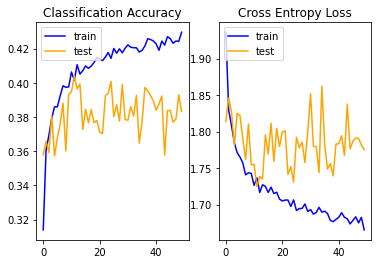

NetB s Summary 
Training accuracy : 53.66 
Testing accuracy : 47.05


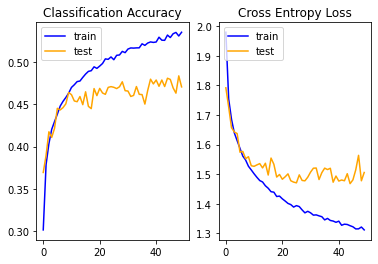

NetC s Summary 
Training accuracy : 78.33 
Testing accuracy : 62.99


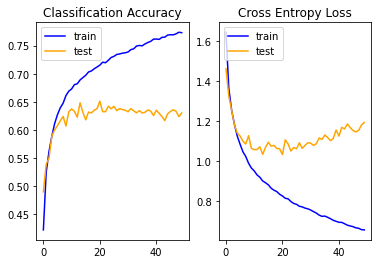

In [8]:
for story in results:
    print('{} s Summary \nTraining accuracy : {} \nTesting accuracy : {}'.format(
                                                                                story['net'],
                                                                                story['train_acc'],
                                                                                story['test_acc']      
                                                                                  ))
    plot(story['History'])